In [35]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import re

In [36]:
# pip install selenium

In [40]:
user_id = 'qqq3964@naver.com'# 아이디
user_pw = 'asdfg159@'# 비밀번호

driver = webdriver.Chrome('chromedriver.exe')
driver.implicitly_wait(2)
driver.get('https://www.instagram.com/')

C:\Users\007\AppData\Local\Temp\ipykernel_14284\3922856736.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [41]:
from selenium.webdriver.common.by import By

In [42]:
# 로그인 정보 입력
driver.find_element(By.NAME, 'username').send_keys(user_id)
time.sleep(3)
driver.find_element(By.NAME, 'password').send_keys(user_pw)
time.sleep(3)

# 로그인 버튼 누르기 - 참고!
driver.find_element(By.NAME,'password').send_keys(Keys.ENTER)
driver.implicitly_wait(5)
# 설정 나중에 하기 버튼 누르기 - 참고!
try :
    driver.find_element(By.CLASS_NAME,'_ac8f').click()
    driver.implicitly_wait(5)
# 나중에하기 2번버튼 (알림설정)
except :
    pass
driver.find_element(By.CSS_SELECTOR,'button._a9--._a9_1').click()
time.sleep(3)

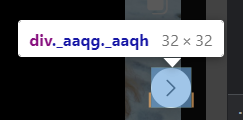
이런식으로 코드를 띄어쓰기일때 작성해야함  _aaqg _aaqh 이렇게 되어있는걸 저런식으로해야함

In [116]:
# F12 를 눌러서 확인한다. HTML 들어가서 확인

# 따라서 특정 검색어에 따른 주소
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url


# 첫 번째 페이지 클릭
def select_first(driver):
    first = driver.find_element(
        By.CSS_SELECTOR,'div._aagw')

    first.click()
    time.sleep(3)


# 다음 페이지로 넘어가는 코드
def move_next(driver):
    right = driver.find_element(
        By.CSS_SELECTOR,'div._aaqg._aaqh')
    time.sleep(3)
    right.click()
    time.sleep(3)


# 정보 저장
def get_content(driver):
    html = driver.page_source
    # BeautifulSoup은 html과 xml 문서를 parsing 하기 위한 패키지로 html에서 데이터를 추출하는 데 유용한 구문 분석트리를 생성함.
    soup = BeautifulSoup(html, 'html.parser')
    # 본문 내용
    try:
        # > 는 바로아래있는 태그로 가는거고 띄어쓰기는 그 태그 안에 것들
        content = soup.select('div._a9zr div._a9zs span a')[0].text
        tag = re.findall(r'#[가-힣]+', content)
        hashtag = ' '.join(tag)
    except:
        content = ' '

    return hashtag

In [119]:
def crawling(word):
    url = insta_searching(word)

    driver.get(url)
    time.sleep(3)

    select_first(driver)

    results = []
    print(results)

    target = 150  # 크롤링 할 글 갯수

    for i in range(target):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)

    print(results)

In [120]:
crawling('')

[]
['#포메라니안', '', '', '', '']


In [121]:
import pandas as pd

In [123]:
df = pd.read_csv('강아지.csv')
df.head()

,hashtag
0,#포메라니안 #루퐁이네 #루퐁이네유튜브
1,#시바견 #강아지
2,#생일
3,NaN
4,#비숑프리제 #비숑 #개 #멍스타그램 #개스타그램 #강아지
